In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tikzplotlib

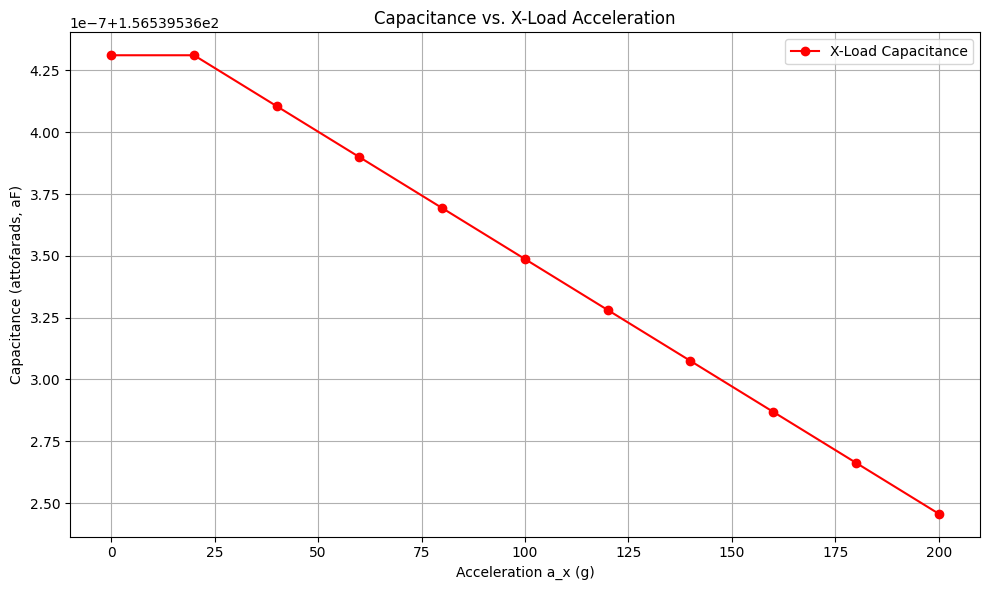

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Data: acceleration (a_x) in g and capacitance in Farads
a_x = np.array([0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200])
capacitance_x = np.array([
    1.5653953643116492E-16, 1.5653953643116628E-16, 1.5653953641055118E-16,
    1.565395363899372E-16, 1.5653953636932466E-16, 1.5653953634871557E-16,
    1.5653953632810838E-16, 1.5653953630750378E-16, 1.565395362869004E-16,
    1.5653953626630118E-16, 1.5653953624570217E-16
])

# Convert capacitance to attofarads (1E-18)
capacitance_x_af = capacitance_x * 1e18

# Plot
plt.figure(figsize=(10, 6))
plt.plot(a_x, capacitance_x_af, marker='o', linestyle='-', color='r', label="X-Load Capacitance")

# Labels and Title
plt.xlabel("Acceleration a_x (g)")
plt.ylabel("Capacitance (attofarads, aF)")
plt.title("Capacitance vs. X-Load Acceleration")
plt.grid(True)
plt.legend()
plt.tight_layout()

# Show Plot
plt.show()


In [2]:
# Some useful constants and parameters
rho = 2320 # [kg/m^3] - polysilicon mass density
E = 169e9  # [Pa] - polysilicon Young's modulus
g = 9.81 # [m/s^2] - Earth gravitational acceleration
w_m = 800e-6 # [m] - central mass width
l_m = 800e-6 # [m] - central mass length
t_m = 4e-6   # [m] - central mass thickness
w_f = 10e-6  # [m] - movable fingers width
l_f = 400e-6 # [m] - movable fingers length
t_f = 4e-6   # [m] - movable fingers thickness
l_bx = 700e-6 # [m] - length of the straight beam
w_bx_default = 20e-6  # [m] - width  of the straight beam
t_bx_default = 4e-6   # [m] - thickness of the straight beam
l_by = 700e-6 # [m] - length of a segment of the folded beam
w_by = 20e-6 # [m] - width of a segment of the folded beam
t_by = 4e-6  # [m] - thickness of a segment of the folded beam
w_junc = 40e-6 # [m] - width of the junction between two folded beam segments
l_junc = 40e-6 # [m] - length of the junction between two folded beam segments

# Sweep of acceleration along x axis

In [12]:
path = r'..\COMSOL\exported_data\a_x_sweep_data.csv'

with open(path, 'r') as file:
    lines = file.readlines()

xy_values = [tuple(map(float, line.split(','))) for line in lines if not line.startswith('%')]

a_x, eq_x_stiffness, mass, x_displacement, s_x, stress = zip(*xy_values)

a_x = np.array(a_x)
x_displacement = np.array(x_displacement)
s_x = np.array(s_x)
eq_x_stiffness = np.array(eq_x_stiffness)
mass = np.array(mass)

In [13]:
I_0 = (t_by)*pow(w_by,3)/12
I_p = (t_by)*pow(w_junc,3)/12
I_ini = (t_bx_default)*pow(w_bx_default/2,3)/12
l_0=l_by
l_1=l_by
l_2=0
l_ini=0
l_fin=l_bx
l_p=l_junc
k_x_castigliano = E*I_0*pow(1/l_by, 3)*(2*l_fin*l_p/(l_0*l_0)+pow(l_p/l_0, 2)+pow(l_fin/l_0, 2)*(l_1/l_0)+pow(l_fin/l_0, 2)+(I_0/I_p)*(l_p/l_0)*2*((4/3)*pow(l_p/l_0, 2))+(I_0/I_ini)*(l_ini/l_0)*(4*pow(l_p/l_0,2)+2*l_p*l_ini/pow(l_0,2)+(1/3)*pow(l_ini/l_0,2)))
print(4*1/k_x_castigliano)

1.4376462491800786


In [31]:
# X equivalent stiffness (mean)
k_x_reduced = (eq_x_stiffness[0]+eq_x_stiffness[-1])/2
k_x = 8*k_x_reduced
k_x_complex = 4*E*(t_bx_default)*pow((w_bx_default/2)/l_bx, 3)*(l_bx-l_by/3.6)/(l_bx+0.3*l_by)
k_x_article = 2*E*(t_bx_default)*pow((w_bx_default)/l_bx, 3)
print(k_x_reduced)
print(k_x)
#print(k_x_complex)
print(k_x_article)
alpha = pow(w_by/(w_bx_default/2), 3)
k_x_random = E*t_bx_default*pow((w_bx_default/2)/l_bx, 3)*(l_by+4*alpha*l_bx)/(l_by+alpha*l_bx)
I_p = (t_by)*pow(40e-6,3)/12
I_0 = (t_by)*pow(w_by,3)/12
l_0 = l_by + 20e-6
l_p = 40e-6 + w_by
k_x_u_shape = 6*E*I_0*pow(1/l_0, 3)*1/(pow(l_p/l_0,2)*(1+(1/6)*(I_0/I_p)*(l_p/l_0)))
k_y_u_shape = 6*E*I_0*pow(1/l_0, 3)*(1+0.5*(I_0/I_p)*(l_p/l_0))/(1+2*(I_0/I_p)*(l_p/l_0))
k_x_crab_leg = E*(t_bx_default)*pow((w_bx_default/2)/l_bx, 3)
k_x_very_complex = (k_x_u_shape*k_x_crab_leg)/(k_x_u_shape+k_x_crab_leg)
#print(8*k_x_very_complex)
#print(4*k_x_very_complex)

2.1410854442513587
17.12868355401087
31.533527696793012


In [38]:
# X sensitivity
print(s_x[0])
s_x_ideal = rho*(w_m*l_m*t_m+64*w_f*l_f*t_f)*g/k_x_article
s_x_real= rho*(w_m*l_m*t_m+64*w_f*l_f*t_f)*g/k_x
print(s_x_ideal/1e-6)
print(s_x_real/1e-6)

0.004761565091793616
0.0025867379502958576
0.0047606848063392795


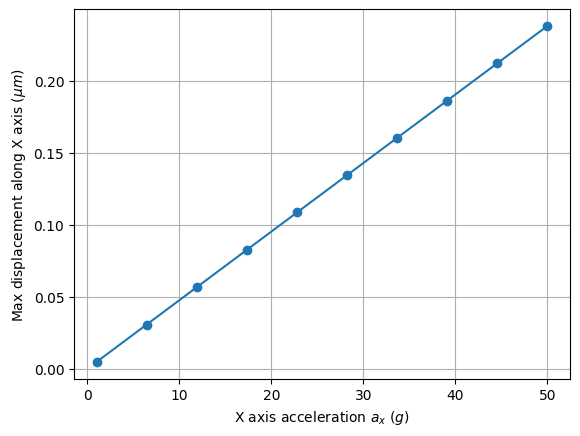

In [16]:
plt.plot(a_x, x_displacement, "o-")
plt.xlabel("X axis acceleration $a_x$ $(g)$")
plt.ylabel("Max displacement along X axis $(\\mu m)$")
plt.grid('on')
tikzplotlib.save("../report/tikz/x_disp.tex")

In [12]:
# Let's compare the equivalent stiffness coefficients obtained in the full simulation and in the single beam simulation

path = r'..\COMSOL\exported_data\x_stiffness.csv'

with open(path, 'r') as file:
    lines = file.readlines()

xy_values = [tuple(map(float, line.split(','))) for line in lines if not line.startswith('%')]

a_x, x_stiffness, x_compliance, x_beam_displacement = zip(*xy_values)

a_x = np.array(a_x)
eq_x_stiffness = np.array(eq_x_stiffness)
x_stiffness = np.array(x_stiffness)
x_stiffness_complex = np.array([4*E*(t_bx_default)*pow((w_bx_default/2)/l_bx, 3)*(l_bx-l_by/3.6)/(l_bx+0.3*l_by)] * len(a_x))
x_stiffness_ideal = np.array([4*E*(t_bx_default)*pow((w_bx_default/2)/l_bx, 3)] * len(a_x))
x_displacement = np.array(x_displacement)
x_beam_displacement = np.array(x_beam_displacement)

In [13]:
k_x_article = E*pow((w_bx_default)/l_bx, 3)*(t_bx_default)
k_x_complex = E*(t_bx_default/2)*pow((w_bx_default/2)/l_bx, 3)*(l_bx-l_by/3.6)/(l_bx+0.3*l_by)
print(x_stiffness[0])
#print(k_x_complex)
print(4*eq_x_stiffness[0])

9.082317862887386
8.562428150982628


# Sweep of acceleration along y axis

In [19]:
path = r'..\COMSOL\exported_data\a_y_sweep_data.csv'

with open(path, 'r') as file:
    lines = file.readlines()

xy_values = [tuple(map(float, line.split(','))) for line in lines if not line.startswith('%')]

a_y, eq_y_stiffness, mass, y_displacement, s_y, stress = zip(*xy_values)

s_y = np.array(s_y)
eq_y_stiffness = np.array(eq_y_stiffness)


In [32]:
# Y equivalent stiffness (mean)
k_y_reduced = (eq_y_stiffness[0]+eq_y_stiffness[-1])/2
k_y = 8*k_y_reduced
k_y_article = 2*E*pow((w_by)/l_by, 3)*(t_by)
print(k_y_reduced)
print(k_y)

4.103999373618775
32.8319949889502


In [21]:
# Y displacement sensitivity
print(s_y[0])
s_y_ideal = rho*(w_m*l_m*t_m+64*w_f*l_f*t_f)*g/k_y_article
s_y_real= rho*(w_m*l_m*t_m+64*w_f*l_f*t_f)*g/k_y
print(s_y_ideal/1e-6)
print(s_y_real/1e-6)

0.0024835868974005786
0.0025867379502958576
0.002484435466911241


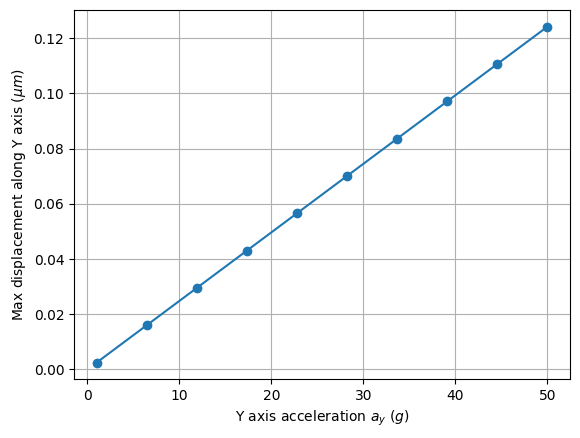

In [23]:
plt.plot(a_y, y_displacement, "o-")
plt.xlabel("Y axis acceleration $a_y$ $(g)$")
plt.ylabel("Max displacement along Y axis $(\\mu m)$")
plt.grid('on')
tikzplotlib.save("../report/tikz/y_disp.tex")

In [18]:
# Let's compare the equivalent stiffness coefficients obtained in the full simulation and in the single beam simulation

path = r'..\COMSOL\exported_data\y_stiffness.csv'

with open(path, 'r') as file:
    lines = file.readlines()

xy_values = [tuple(map(float, line.split(','))) for line in lines if not line.startswith('%')]

a_y, y_stiffness, y_compliance, y_beam_displacement = zip(*xy_values)

a_y = np.array(a_y)
eq_y_stiffness = np.array(eq_y_stiffness)
y_stiffness = np.array(y_stiffness)
y_stiffness_ideal = [E*t_bx_default*pow(w_by/l_by, 3)] * len(a_y)
y_beam_displacement = np.array(y_beam_displacement)
y_displacement = np.array(y_displacement)
mass = np.array(mass)

# Sweep of straight beam thickness

In [4]:
path = r'..\COMSOL\exported_data\tbx_sweep_data.csv'

with open(path, 'r') as file:
    lines = file.readlines()

xy_values = [tuple(map(float, line.split(','))) for line in lines if not line.startswith('%')]

t_bx, s_x_tbx_sweep = zip(*xy_values)

t_bx = np.array(t_bx)*1e-6
s_x_tbx_sweep = np.array(s_x_tbx_sweep)*1e-6
k_x_article_tbx = 2*E*pow(w_bx_default/l_bx, 3)*t_bx
s_x_tbx_sweep_ideal = rho*(w_m*l_m*t_m+64*w_f*l_f*t_f)*g/k_x_article_tbx

In [5]:
print(s_x_tbx_sweep_ideal/1e-6)

[0.01034695 0.00409567 0.00255314 0.00185464 0.00145624 0.00119873
 0.00101861 0.00088555 0.00078324 0.00070211 0.00063622 0.00058163
 0.00053567 0.00049644 0.00046257 0.00043302 0.00040702 0.00038397
 0.00036339 0.0003449 ]


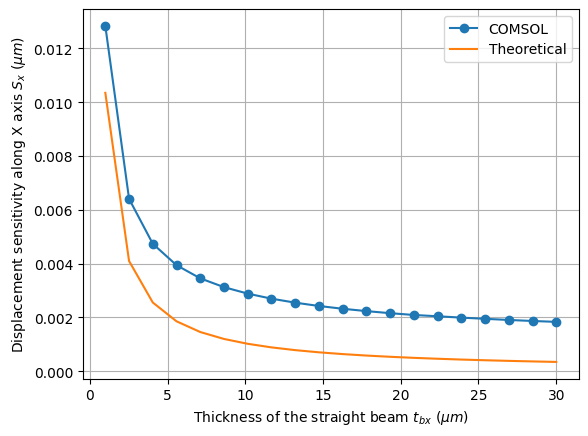

In [6]:
plt.plot(t_bx/1e-6, s_x_tbx_sweep/1e-6, "o-", label="COMSOL")
plt.plot(t_bx/1e-6, s_x_tbx_sweep_ideal/1e-6, label="Theoretical")
plt.legend(loc="best")
plt.xlabel("Thickness of the straight beam $t_{bx}$ $(\\mu m)$")
plt.ylabel("Displacement sensitivity along X axis $S_x$ $(\\mu m)$")
plt.grid('on')
#tikzplotlib.save("../report/tikz/tbx_sweep.tex")

In [15]:
# Model adjustment and error evaluation
k_x_folded = 37.49638047386981
k_x_article_tbx_adjusted = k_x_article_tbx*k_x_folded/(k_x_article_tbx+k_x_folded)
s_x_tbx_sweep_ideal_adjusted = rho*(w_m*l_m*t_m+64*w_f*l_f*t_f)*g/k_x_article_tbx_adjusted
print(s_x_tbx_sweep_ideal_adjusted/1e-6)

error_tbx = 100*(s_x_tbx_sweep-s_x_tbx_sweep_ideal)/s_x_tbx_sweep_ideal
error_tbx_adjusted = 100*(s_x_tbx_sweep-s_x_tbx_sweep_ideal_adjusted)/s_x_tbx_sweep_ideal_adjusted

[0.01252233 0.00627105 0.00472853 0.00403002 0.00363162 0.00337411
 0.00319399 0.00306093 0.00295862 0.0028775  0.0028116  0.00275702
 0.00271106 0.00267183 0.00263795 0.0026084  0.00258241 0.00255935
 0.00253877 0.00252028]


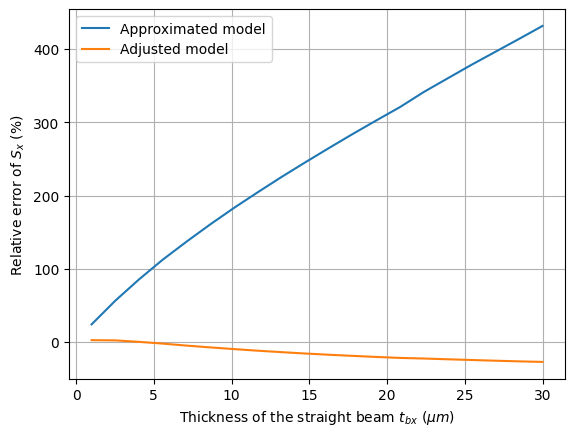

In [16]:
plt.plot(t_bx/1e-6, error_tbx, label="Approximated model")
plt.plot(t_bx/1e-6, error_tbx_adjusted, label="Adjusted model")
plt.legend(loc="best")
plt.xlabel("Thickness of the straight beam $t_{bx}$ $(\\mu m)$")
plt.ylabel("Relative error of $S_x$ (%)")
plt.grid('on')
tikzplotlib.save("../report/tikz/tbx_errors.tex")

# Sweep of straight beam width

In [17]:
path = r'..\COMSOL\exported_data\wbx_sweep_data.csv'

with open(path, 'r') as file:
    lines = file.readlines()

xy_values = [tuple(map(float, line.split(','))) for line in lines if not line.startswith('%')]

w_bx, s_x_wbx_sweep = zip(*xy_values)
w_bx = np.array(w_bx)*1e-6
s_x_wbx_sweep = np.array(s_x_wbx_sweep)*1e-6
k_x_article_wbx = 2*E*pow(w_bx/l_bx, 3)*t_bx_default
s_x_wbx_sweep_ideal = rho*(w_m*l_m*t_m+64*w_f*l_f*t_f)*g/k_x_article_wbx

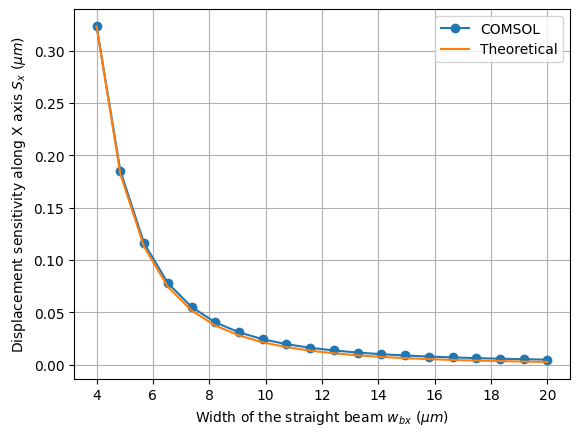

In [18]:
plt.plot(w_bx/1e-6, s_x_wbx_sweep/1e-6, "o-", label="COMSOL")
plt.plot(w_bx/1e-6, s_x_wbx_sweep_ideal/1e-6, label="Theoretical")
plt.legend(loc="best")
plt.xlabel("Width of the straight beam $w_{bx}$ $(\\mu m)$")
plt.ylabel("Displacement sensitivity along X axis $S_x$ $(\\mu m)$")
plt.grid('on')
#tikzplotlib.save("../report/tikz/wbx_sweep.tex")

In [19]:
# Model adjustment and error evaluation
k_x_folded = 37.49638047386981
k_x_article_adjusted_wbx = k_x_article_wbx*k_x_folded/(k_x_article_wbx+k_x_folded)
s_x_wbx_sweep_ideal_adjusted = rho*(w_m*l_m*t_m+64*w_f*l_f*t_f)*g/k_x_article_adjusted_wbx
print(s_x_wbx_sweep_ideal_adjusted/1e-6)

error_wbx = 100*(s_x_wbx_sweep-s_x_wbx_sweep_ideal)/s_x_wbx_sweep_ideal
error_wbx_adjusted = 100*(s_x_wbx_sweep-s_x_wbx_sweep_ideal_adjusted)/s_x_wbx_sweep_ideal_adjusted

[0.32551763 0.18445569 0.11485152 0.07662083 0.0539026  0.03956314
 0.03006984 0.02353678 0.01889448 0.01550554 0.01297398 0.01104493
 0.00954931 0.00837191 0.0074324  0.00667362 0.00605411 0.00554333
 0.00511844 0.00476212]


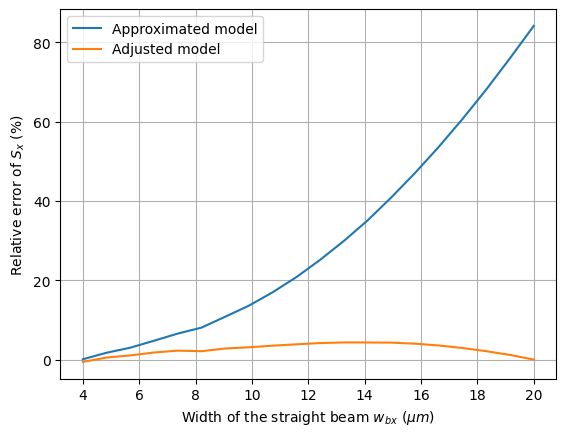

In [20]:
plt.plot(w_bx/1e-6, error_wbx, label="Approximated model")
plt.plot(w_bx/1e-6, error_wbx_adjusted, label="Adjusted model")
plt.legend(loc="best")
plt.xlabel("Width of the straight beam $w_{bx}$ $(\\mu m)$")
plt.ylabel("Relative error of $S_x$ (%)")
plt.grid('on')
tikzplotlib.save("../report/tikz/wbx_errors.tex")